# Business Understanding
Boeren krijgen alleen betaald voor het vet wat in de melk zit, daarvan kun je kaas maken. Om boeren dus eerlijk te compenseren is het van belang om snel en accuraat de hoeveelheid vet in een lading melk te meten. De standaard manier om dit te doen is via een chemische meting, dit is alleen vrij traag en erg duur. Een alternatieve aanpak is het gebruik van infraroodspectroscopie. 

Het idee is om infraroodlicht door een dun laagje melk te stralen. Bepaalde chemische componenten in de melk absorberen licht op bepaalde golflengtes. Hoe meer van de chemische component aanwezig is, hoe sterker de absorptie. Elk melk sample heeft dus een uniek absorptiespectrum. De uitdaging voor jullie is om een statistisch model te maken wat chemische referentie metingen van vet koppelt aan de gemeten absorptiespectra. 

Als dit statistisch model gemaakt is hoeven we van een nieuw melksample alleen het spectrum te meten om een schatting van de hoeveelheid vet te krijgen. Dit is veel sneller en orde grootte goedkoper. 

# Data Understanding
De aangeleverde data bevat 48 melksamples van elk 3 metingen in de vorm van `.spc` files. Daarnaast is er een Excel bevat beschikbaar met de waardes voor vet, proteïne en lactose per meting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Labels

(48, 4)


,Sample,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,Sample 1.spc,2.362,3.486,5.189
1,Sample 2.spc,6.438,3.692,4.878
2,Sample 3.spc,4.245,4.038,5.233
3,Sample 4.spc,4.171,4.235,5.120
4,Sample 5.spc,5.580,4.195,5.000


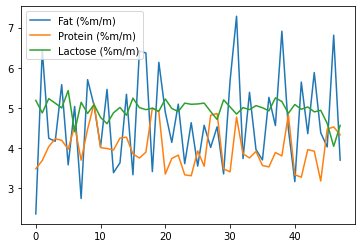

In [2]:
labels = pd.read_excel('Reference values.xlsx')
print(labels.shape)
labels.plot()
labels.head()

### Features

gx-y(3)


397.306909    0.102523
401.164258    1.008154
405.021606    1.008154
408.878955    1.008154
412.736304    0.108095
dtype: float64

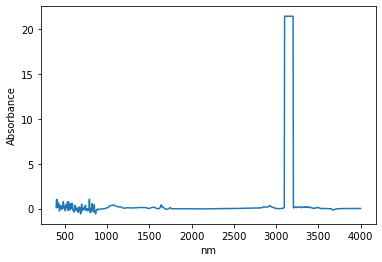

In [3]:
from pyspectra.readers.read_spc import read_spc

spc = read_spc('Spectra\Sample 01.spc')
plt.xlabel("nm")
plt.ylabel("Absorbance")
spc.plot()
spc.head()

Belangrijke gebieden om in de gaten te houden zijn: 
- Fingerprint: 1000 t/m 1585 nm
- C=O - 1700nm
- CH2 (vet) - 2800 t/m 3000 nm

Als we kijken naar deze gebieden krijgen we:
#### Fingerprint

<AxesSubplot:>

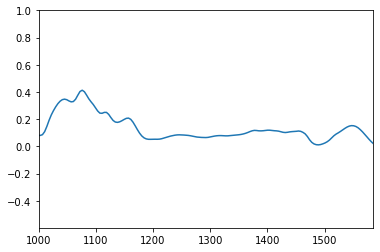

In [4]:
plt.xlim([1000, 1585])
plt.ylim([spc.min(), 1])
spc.plot()

#### C=O

<AxesSubplot:>

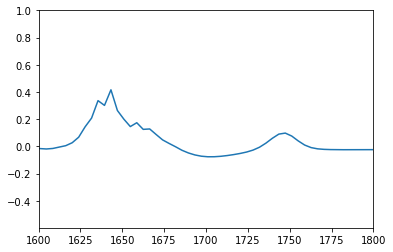

In [5]:
plt.xlim([1600, 1800])
plt.ylim([spc.min(), 1])
spc.plot()

#### CH2 (Vet)

<AxesSubplot:>

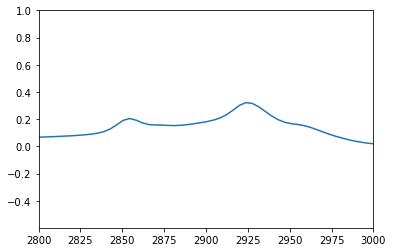

In [6]:
plt.xlim([2800, 3000])
plt.ylim([spc.min(), 1])
spc.plot()

Hieronder vind je dezelfde belangrijke reflectie gebieden, nu alleen vergeleken met alle 48 samples die er zijn.

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


,Sample 01.spc,Sample 02.spc,Sample 03.spc,Sample 04.spc,Sample 05.spc,Sample 06.spc,Sample 07.spc,Sample 08.spc,Sample 09.spc,Sample 10.spc,...,Sample 39.spc,Sample 40.spc,Sample 41.spc,Sample 42.spc,Sample 43.spc,Sample 44.spc,Sample 45.spc,Sample 46.spc,Sample 47.spc,Sample 48.spc
397.306909,0.102523,0.656228,0.078909,-0.052476,-0.132207,-0.220950,-0.274788,0.225479,-0.180702,-0.079924,...,0.253597,0.114136,0.431783,-0.226561,0.548220,-0.152890,0.289391,-0.323950,-0.080623,-0.069079
401.164258,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
405.021606,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
408.878955,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
412.736304,0.108095,-0.210741,-0.351144,-0.023848,0.531072,0.043406,0.346499,-0.235037,0.069180,0.005067,...,0.097619,-0.281803,-0.242505,-0.100974,0.736043,-0.032641,0.120329,-0.411707,-0.113812,0.222036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984.641138,0.008057,0.015969,0.012250,0.007834,0.011976,0.008789,0.010493,0.007317,0.012368,0.016062,...,0.028549,0.010231,0.010109,0.020968,0.010112,0.017721,0.013247,0.009502,0.017391,0.008885
3988.498486,0.007464,0.015893,0.011900,0.007489,0.011802,0.008386,0.010298,0.006770,0.012298,0.015982,...,0.028580,0.010032,0.009579,0.020718,0.009771,0.017608,0.012797,0.009161,0.017366,0.008486
3992.355835,0.006890,0.015893,0.011637,0.007227,0.011695,0.008029,0.010166,0.006263,0.012278,0.015956,...,0.028665,0.009902,0.009068,0.020542,0.009495,0.017565,0.012406,0.008886,0.017393,0.008138
3996.213184,0.006382,0.015977,0.011477,0.007071,0.011686,0.007779,0.010135,0.005838,0.012330,0.016003,...,0.028776,0.009853,0.008631,0.020469,0.009315,0.017603,0.012110,0.008693,0.017478,0.007891


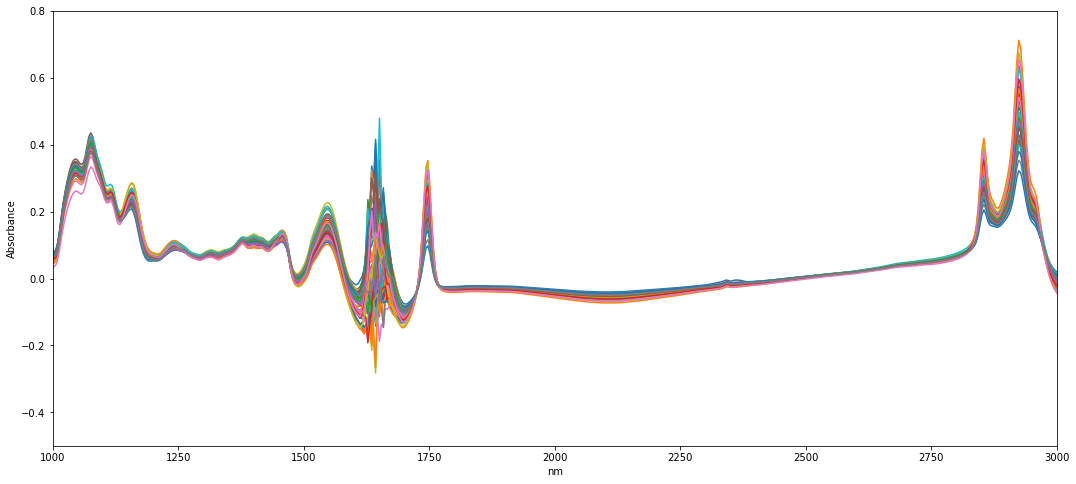

In [7]:
from pyspectra.readers.read_spc import read_spc_dir

df_spc, dict_spc = read_spc_dir('Spectra')
display(df_spc.transpose())
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("nm")
plt.ylabel("Absorbance")
plt.xlim([1000, 3000])
plt.ylim([-0.5, 0.8])
plt.show()

Dit zijn de resultaten van de laatste meting. In totaal zijn er 3 metingen gedaan.

(-0.1, 0.5)

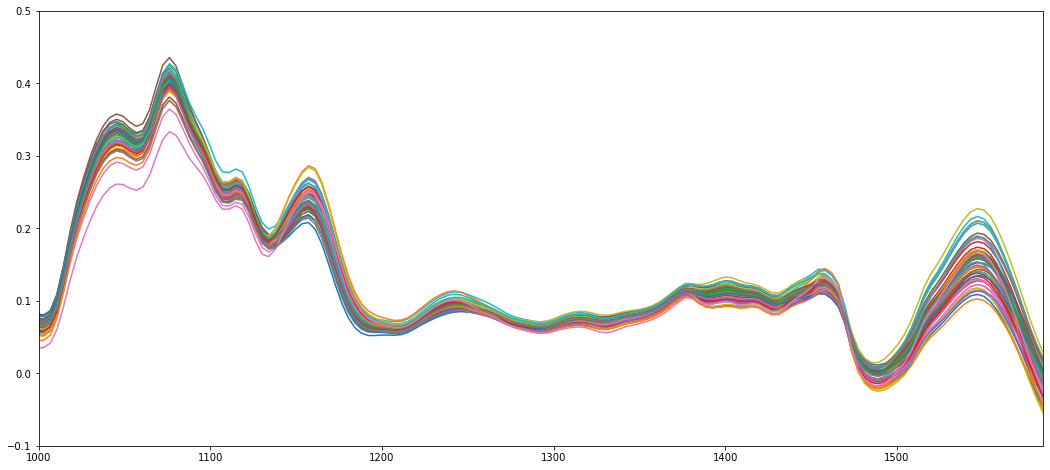

In [8]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([1000, 1585])
plt.ylim([-0.1, 0.5])

(-0.3, 0.5)

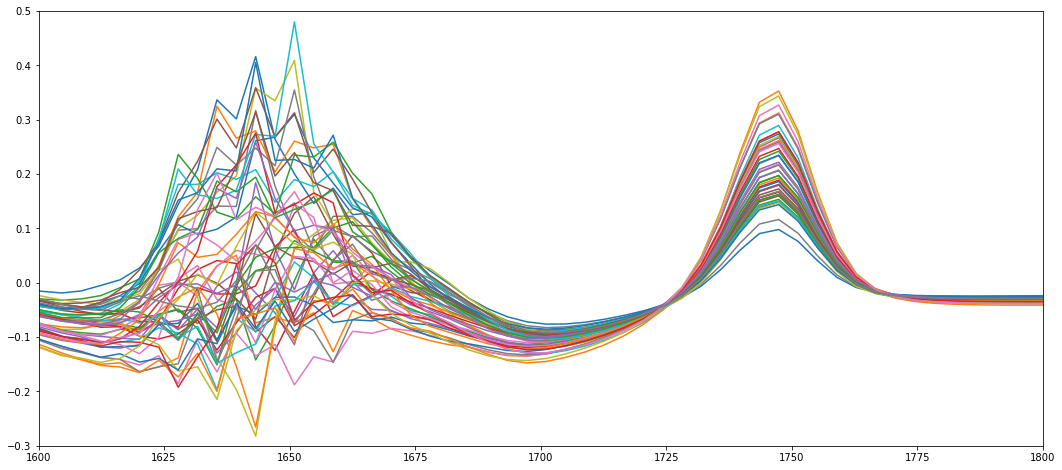

In [9]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([1600, 1800])
plt.ylim([-0.3, 0.5])

Let op: Het gaat hierbij om het punt 1700!

(-0.1, 0.8)

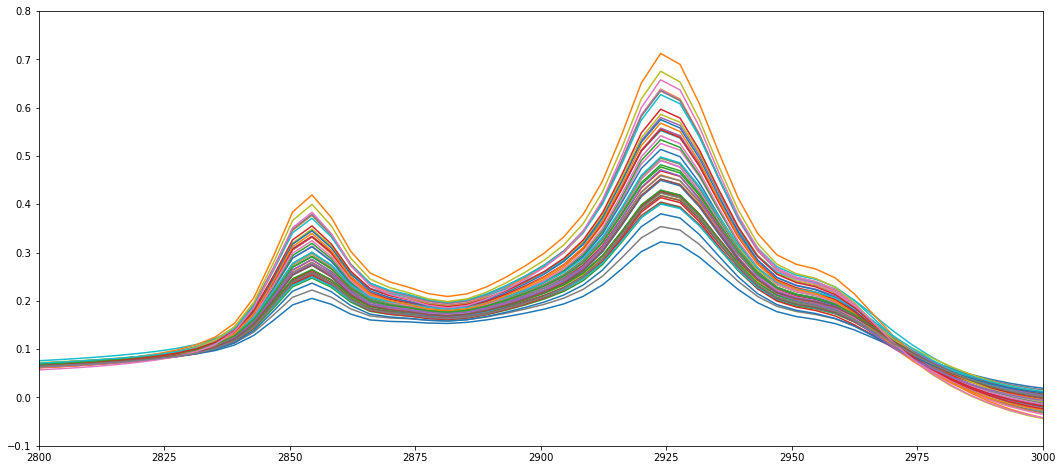

In [10]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([2800, 3000])
plt.ylim([-0.1, 0.8])

# Data Preperation
Omdat we niet goed onze data kunnen beheren met de pyspectra library, gaan we nu werken met de 'spc' library (https://github.com/rohanisaac/spc). Als eerste moeten we de data van alle samples bij elkaar toevoegen en sorteren, daarna kunnen we verder met de modeling fase.

In [11]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Sample = pd.read_excel('Reference values.xlsx')
Sample = Sample.drop(columns=['Fat (%m/m)', 'Protein (%m/m)', 'Lactose (%m/m)'])

Samples = pd.DataFrame()
for meting in range(3):
    Samples = Samples.append(Sample)
    
print(Samples.shape)
Samples.head()

(144, 1)


,Sample
0,Sample 1.spc
1,Sample 2.spc
2,Sample 3.spc
3,Sample 4.spc
4,Sample 5.spc


##### Vul een dataframe met alle infrarood metingen:

In [12]:
import spc
import os

X_all = pd.DataFrame()

# Eerst alle resultaten van de éérste meting in de DataFrame, daarna van de tweede meting, enz.
for meting in range(3):
    for file in os.listdir('Spectra'):
        f = spc.File('Spectra/' + file)
        X = pd.DataFrame(np.array([f.sub[meting].y]), columns = f.x)
        X_all = X_all.append(X)
        X_all.rename(index={0: file}, inplace=True)

print(X_all.shape)
print(X_all)
X_all.head()

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


,397.306909,401.164258,405.021606,408.878955,412.736304,416.593652,420.451001,424.308350,428.165698,432.023047,...,3965.354395,3969.211743,3973.069092,3976.926440,3980.783789,3984.641138,3988.498486,3992.355835,3996.213184,4000.070532
Sample 01.spc,0.469832,1.008154,1.008154,1.008154,0.052305,0.115211,0.258473,-0.136622,-0.067475,0.161927,...,0.008624,0.008933,0.008978,0.008795,0.008411,0.007903,0.007321,0.006737,0.006204,0.005813
Sample 02.spc,0.036340,1.008154,1.008154,1.008154,-0.245884,0.437485,-0.084588,0.321545,0.418179,0.062782,...,0.015464,0.015520,0.015492,0.015413,0.015263,0.015097,0.014977,0.014936,0.014957,0.015070
Sample 03.spc,0.171913,1.008154,1.008154,1.008154,0.022575,0.043902,0.118441,0.511623,0.081028,-0.003878,...,0.014014,0.014094,0.013999,0.013778,0.013474,0.013104,0.012719,0.012427,0.012251,0.012190
Sample 04.spc,-0.137874,1.008154,1.008154,1.008154,-0.141261,-0.261323,-0.121438,0.053877,0.524266,-0.152092,...,0.008258,0.008369,0.008305,0.008094,0.007761,0.007389,0.007037,0.006772,0.006603,0.006562
Sample 05.spc,-0.013833,1.008154,1.008154,1.008154,0.030390,0.121115,0.624298,0.123737,-0.296766,-0.295912,...,0.013530,0.013617,0.013591,0.013444,0.013226,0.012983,0.012765,0.012652,0.012642,0.012721


##### Vul een dataframe met alle referentie waarden 3 keer onder elkaar:

In [13]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Y = pd.read_excel('Reference values.xlsx')
Y = Y.drop(columns=['Sample'])

Y_all = pd.DataFrame()
for meting in range(3):
    Y_all = Y_all.append(Y, ignore_index=True)
    
print(Y_all.shape)
Y_all.head()

(144, 3)


,Fat (%m/m),Protein (%m/m),Lactose (%m/m)
0,2.362,3.486,5.189
1,6.438,3.692,4.878
2,4.245,4.038,5.233
3,4.171,4.235,5.120
4,5.580,4.195,5.000


##### Vul een dataframe met de vet referentie waarden 3 keer onder elkaar:

In [14]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Y = pd.read_excel('Reference values.xlsx')
Y = Y.drop(columns=['Sample', 'Protein (%m/m)', 'Lactose (%m/m)'])

Y_Fat = pd.DataFrame()
for meting in range(3):
    Y_Fat = Y_Fat.append(Y, ignore_index=True)
    
print(Y_Fat.shape)
Y_Fat.head()

(144, 1)


,Fat (%m/m)
0,2.362
1,6.438
2,4.245
3,4.171
4,5.580


##### Vul een dataframe met de proteïne referentie waarden 3 keer onder elkaar:

In [15]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Y = pd.read_excel('Reference values.xlsx')
Y = Y.drop(columns=['Sample', 'Fat (%m/m)', 'Lactose (%m/m)'])

Y_Protein = pd.DataFrame()
for meting in range(3):
    Y_Protein = Y_Protein.append(Y, ignore_index=True)
    
print(Y_Protein.shape)
Y_Protein.head()

(144, 1)


,Protein (%m/m)
0,3.486
1,3.692
2,4.038
3,4.235
4,4.195


##### Vul een dataframe met de lactose referentie waarden 3 keer onder elkaar:

In [16]:
# Omdat er 3 metingen zijn gedaan, moeten we deze 3 keer met de referentie waarden vergelijken
Y = pd.read_excel('Reference values.xlsx')
Y = Y.drop(columns=['Sample', 'Fat (%m/m)', 'Protein (%m/m)'])

Y_Lactose = pd.DataFrame()
for meting in range(3):
    Y_Lactose = Y_Lactose.append(Y, ignore_index=True)
    
print(Y_Lactose.shape)
Y_Lactose.head()

(144, 1)


,Lactose (%m/m)
0,5.189
1,4.878
2,5.233
3,5.120
4,5.000


# Modeling
Bij het modellen gebruiken we eerst de train_test_split voor lasso. Daarna zullen we dit zonder enige train_test_split doen, zo kunnen we uiteindlijk de resultaten vergelijken.

### Models met train_test_split

##### MultiTaskLassoCV voor alle referentie waarden tegelijk:

In [53]:
from sklearn.model_selection import train_test_split

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, Y_all, test_size=0.2, random_state=11)
print(X_train_all.shape, X_test_all.shape, y_train_all.shape, y_test_all.shape)

(86, 935) (58, 935) (86, 3) (58, 3)


In [54]:
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score

reg_all = MultiTaskLassoCV(cv=5, random_state=11).fit(X_train_all, y_train_all)
r2_score(y_test_all, reg_all.predict(X_test_all))

0.9110553263623328

Note: R2 score geeft de hoeveelheid variatie in de data die wordt verklaard door het model aan.

In [55]:
reg_all.alpha_

0.0008098312264529508

##### LassoCV voor vet (met train_test_split):

In [56]:
from sklearn.model_selection import train_test_split

X_train_Fat, X_test_Fat, y_train_Fat, y_test_Fat = train_test_split(X_all, Y_Fat, test_size=0.2, random_state=11)
print(X_train_Fat.shape, X_test_Fat.shape, y_train_Fat.shape, y_test_Fat.shape)

(115, 935) (29, 935) (115, 1) (29, 1)


In [57]:
from sklearn.linear_model import LassoCV

reg_Fat = LassoCV(cv=5, random_state=11).fit(X_train_Fat, y_train_Fat)
reg_Fat.score(X_test_Fat, y_test_Fat)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9964173581883226

In [58]:
reg_Fat.alpha_

0.0006853595005502158

<AxesSubplot:>

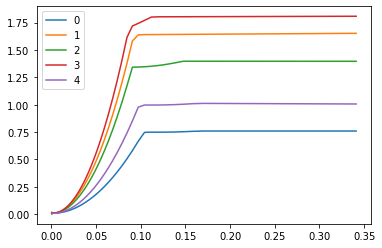

In [59]:
df_Fat = pd.DataFrame(reg_Fat.mse_path_).T
df_Fat.columns = reg_Fat.alphas_
df_Fat.T.plot()

##### LassoCV voor proteïne (met train_test_split):

In [60]:
from sklearn.model_selection import train_test_split

X_train_Protein, X_test_Protein, y_train_Protein, y_test_Protein = train_test_split(X_all, Y_Protein, test_size=0.2, random_state=11)
print(X_train_Protein.shape, X_test_Protein.shape, y_train_Protein.shape, y_test_Protein.shape)

(115, 935) (29, 935) (115, 1) (29, 1)


In [61]:
from sklearn.linear_model import LassoCV

reg_Protein = LassoCV(cv=5, random_state=11).fit(X_test_Protein, y_test_Protein)
reg_Protein.score(X_test_Protein, y_test_Protein)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.23310674754023286

In [62]:
reg_Protein.alpha_

0.05748783538502486

<AxesSubplot:>

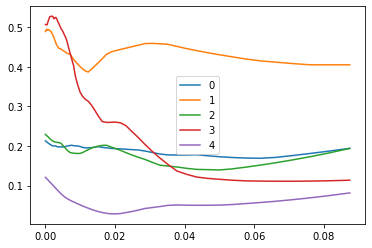

In [63]:
df_Protein = pd.DataFrame(reg_Protein.mse_path_).T
df_Protein.columns = reg_Protein.alphas_
df_Protein.T.plot()

##### LassoCV voor lactose (met train_test_split):

In [64]:
from sklearn.model_selection import train_test_split

X_train_Lactose, X_test_Lactose, y_train_Lactose, y_test_Lactose = train_test_split(X_all, Y_Lactose, test_size=0.2, random_state=11)
print(X_train_Lactose.shape, X_test_Lactose.shape, y_train_Lactose.shape, y_test_Lactose.shape)

(115, 935) (29, 935) (115, 1) (29, 1)


In [65]:
from sklearn.linear_model import LassoCV

reg_Lactose = LassoCV(cv=5, random_state=11).fit(X_train_Lactose, y_train_Lactose)
reg_Lactose.score(X_test_Lactose, y_test_Lactose)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7054563629547839

In [66]:
reg_Lactose.alpha_

0.0024000714007075177

<AxesSubplot:>

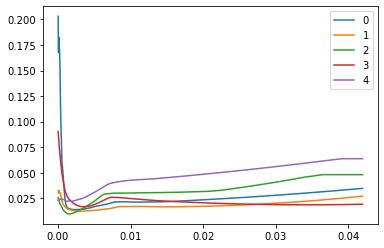

In [67]:
df_Lactose = pd.DataFrame(reg_Lactose.mse_path_).T
df_Lactose.columns = reg_Lactose.alphas_
df_Lactose.T.plot()

### Models zonder train_test_split

##### MultiTaskLassoCV voor alle referentie waarden tegelijk:

In [69]:
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import r2_score

reg_all_2 = MultiTaskLassoCV(cv=5, random_state=11).fit(X_all, Y_all)
r2_score(Y_all, reg_all_2.predict(X_all))

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1950: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.041978927485586515, tolerance: 0.023478008181250027
  cd_fast.enet_coordinate_descent_multi_task(


0.9856840668275959

Note: R2 score geeft de hoeveelheid variatie in de data die wordt verklaard door het model aan.

In [70]:
reg_all_2.alpha_

0.0006186855433434689

##### LassoCV voor vet (zonder train_test_split):

In [73]:
from sklearn.linear_model import LassoCV

reg_Fat_2 = LassoCV(cv=5, random_state=11).fit(X_all, Y_Fat)
reg_Fat_2.score(X_all, Y_Fat)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04809963572730185, tolerance: 0.019061138993749997
  model = cd_fast.enet_coordinate_descent(


0.9997183317520569

In [74]:
reg_Fat_2.alpha_

0.0002457625755031348

<AxesSubplot:>

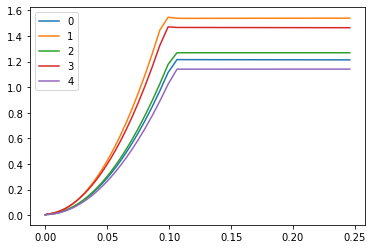

In [75]:
df_Fat_2 = pd.DataFrame(reg_Fat_2.mse_path_).T
df_Fat_2.columns = reg_Fat_2.alphas_
df_Fat_2.T.plot()

##### LassoCV voor proteïne (zonder train_test_split):

In [77]:
from sklearn.linear_model import LassoCV

reg_Protein_2 = LassoCV(cv=5, random_state=11).fit(X_all, Y_Protein)
reg_Protein_2.score(X_all, Y_Protein)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mailm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01008009626469002, tolerance: 0.00363462884375
  model = cd_fast.enet_coordinate_descent(


0.9992817444994287

In [78]:
reg_Protein_2.alpha_

0.00022045279197308845

<AxesSubplot:>

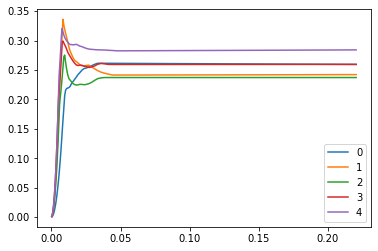

In [79]:
df_Protein_2 = pd.DataFrame(reg_Protein_2.mse_path_).T
df_Protein_2.columns = reg_Protein_2.alphas_
df_Protein_2.T.plot()

##### LassoCV voor lactose (met train_test_split):

In [81]:
from sklearn.linear_model import LassoCV

reg_Lactose_2 = LassoCV(cv=5, random_state=11).fit(X_all, Y_Lactose)
reg_Lactose.score(X_all, Y_Lactose)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7720226954712196

In [83]:
reg_Lactose_2.alpha_

0.0027136945113102715

<AxesSubplot:>

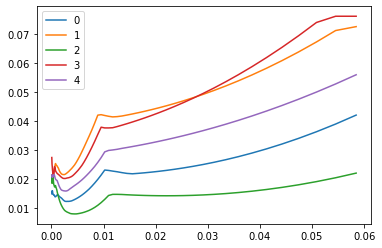

In [84]:
df_Lactose_2 = pd.DataFrame(reg_Lactose_2.mse_path_).T
df_Lactose_2.columns = reg_Lactose_2.alphas_
df_Lactose_2.T.plot()